## PA Approval and Date
Here, we will look at how much PA authorization varies with the date. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes
from sklearn.model_selection import train_test_split

import datetime

First, we create a training set with same seed as in our other files (10475).

In [2]:
cmm = pd.read_csv("Data/CMM.csv")

In [3]:
cmm_pa = cmm[cmm['dim_pa_id'].notna()]
cmm_pa_train, cmm_pa_test = train_test_split(cmm_pa, test_size = 0.2, 
                                             random_state = 10475, shuffle = True,
                                            stratify = cmm_pa.pa_approved)

In [4]:
cmm_pa_train.head()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,correct_diagnosis,tried_and_failed,contraindication,pa_approved
849303,849304,353147.0,737,417740,C,75.0,0,2019-01-07,2019,1,7,2,1,1,0,1.0,0.0,1.0,1.0
1052005,1052006,437248.0,879,417614,A,70.0,0,2019-05-29,2019,5,29,4,1,1,0,1.0,1.0,0.0,1.0
636661,636662,264336.0,564,417380,A,75.0,0,2018-07-18,2018,7,18,4,1,1,0,1.0,1.0,1.0,1.0
151948,151949,63019.0,140,417740,B,70.0,0,2017-05-20,2017,5,20,7,0,0,0,0.0,1.0,1.0,0.0
1214236,1214237,505068.0,1000,417740,C,75.0,0,2019-09-27,2019,9,27,6,1,1,0,1.0,0.0,0.0,1.0


In [5]:
cmm_pa_train[cmm_pa_train["day_of_week"] == 1]

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,correct_diagnosis,tried_and_failed,contraindication,pa_approved
685199,685200,284400.0,603,999001,A,76.0,0,2018-08-26,2018,8,26,1,0,0,0,1.0,0.0,1.0,1.0
1066644,1066645,443312.0,890,417614,A,70.0,0,2019-06-09,2019,6,9,1,0,0,0,1.0,0.0,1.0,0.0
1215291,1215292,505518.0,1002,417380,C,70.0,0,2019-09-29,2019,9,29,1,0,0,0,1.0,1.0,0.0,1.0
981144,981145,407928.0,827,417614,A,70.0,0,2019-04-07,2019,4,7,1,0,0,0,1.0,1.0,0.0,1.0
1251670,1251671,520843.0,1030,417614,A,70.0,0,2019-10-27,2019,10,27,1,0,0,0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581517,581518,241493.0,519,417380,A,75.0,0,2018-06-03,2018,6,3,1,0,0,0,1.0,0.0,0.0,1.0
529229,529230,219766.0,477,417380,A,75.0,0,2018-04-22,2018,4,22,1,0,0,0,1.0,1.0,0.0,1.0
384366,384367,159308.0,365,417614,A,70.0,0,2017-12-31,2017,12,31,1,0,0,0,1.0,1.0,1.0,0.0
1131655,1131656,470494.0,939,417740,C,75.0,0,2019-07-28,2019,7,28,1,0,0,0,1.0,0.0,1.0,0.0


In [6]:
cmm.calendar_year.unique()

array([2017, 2018, 2019], dtype=int64)

In [7]:
#An auxilliary function to find the percentage of df[column1 == val1] given that df[column2 == val2 ]. 
def percentage_given(df, column1, val1, column2, val2):
    intersection = np.sum(np.logical_and(df[column1] == val1,df[column2] == val2));
    total = np.sum(df[column2] == val2);
    return np.round(100*intersection/total,3);

## pa_approved vs day of the week

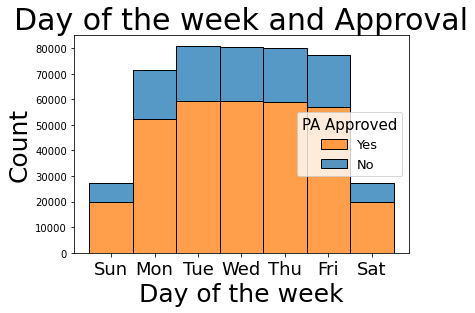

In [8]:

plt.figure()
sns.histplot(cmm_pa_train, x='day_of_week', hue = 'pa_approved',multiple = 'stack',discrete=True)
plt.xticks(ticks=[1,2,3,4,5,6,7], labels=["Sun","Mon","Tue","Wed","Thu","Fri","Sat"],fontsize=18)
plt.title("Day of the week and Approval",fontsize = 30)
plt.xlabel("Day of the week",fontsize=25)
plt.ylabel("Count",fontsize = 25)
plt.legend(["Yes", "No"],title="PA Approved",fontsize=13,title_fontsize=15)


plt.show()

In [9]:
days = cmm_pa_train.day_of_week.unique()
days = np.sort(days)
for day in days:
    print("The percentage of people whose PA is approved given that they apply on the ", day, "-th day of the week is : "
      , percentage_given(cmm_pa_train,'pa_approved',1,'day_of_week',day))

The percentage of people whose PA is approved given that they apply on the  1 -th day of the week is :  73.285
The percentage of people whose PA is approved given that they apply on the  2 -th day of the week is :  73.329
The percentage of people whose PA is approved given that they apply on the  3 -th day of the week is :  73.479
The percentage of people whose PA is approved given that they apply on the  4 -th day of the week is :  73.552
The percentage of people whose PA is approved given that they apply on the  5 -th day of the week is :  73.439
The percentage of people whose PA is approved given that they apply on the  6 -th day of the week is :  73.436
The percentage of people whose PA is approved given that they apply on the  7 -th day of the week is :  73.539


## pa_approved vs month

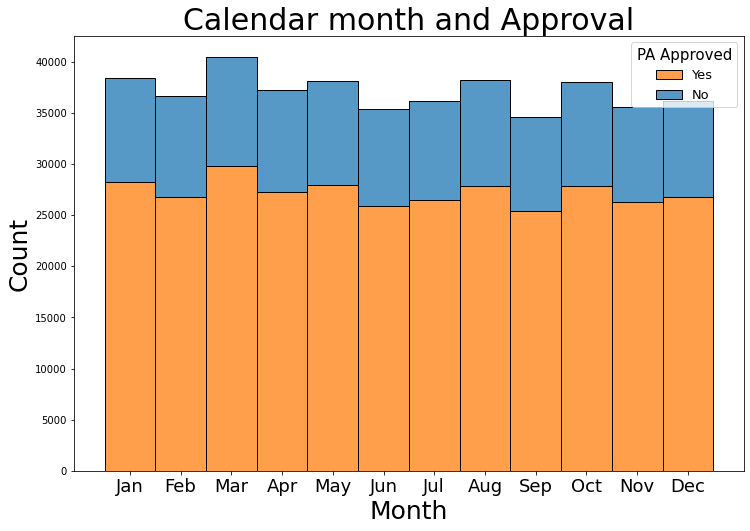

In [10]:
plt.figure(figsize=(12,8))
sns.histplot(cmm_pa_train, x='calendar_month', hue = 'pa_approved',multiple = 'stack',discrete=True)
plt.xticks(ticks=range(1,13), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],fontsize=18)
plt.title("Calendar month and Approval",fontsize = 30)
plt.xlabel("Month",fontsize=25)
plt.ylabel("Count",fontsize = 25)
plt.legend(["Yes", "No"],title="PA Approved",fontsize=13,title_fontsize=15)


plt.show()

In [11]:
months = cmm_pa_train.calendar_month.unique()
months = np.sort(months)
month_name=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
for month in months:
    print("The percentage of people whose PA is approved given that they apply in", month_name[month-1], "is: "
      , percentage_given(cmm_pa_train,'pa_approved',1,'calendar_month',month))

The percentage of people whose PA is approved given that they apply in Jan is:  73.469
The percentage of people whose PA is approved given that they apply in Feb is:  73.251
The percentage of people whose PA is approved given that they apply in Mar is:  73.678
The percentage of people whose PA is approved given that they apply in Apr is:  73.424
The percentage of people whose PA is approved given that they apply in May is:  73.371
The percentage of people whose PA is approved given that they apply in Jun is:  73.342
The percentage of people whose PA is approved given that they apply in Jul is:  73.061
The percentage of people whose PA is approved given that they apply in Aug is:  72.92
The percentage of people whose PA is approved given that they apply in Sep is:  73.456
The percentage of people whose PA is approved given that they apply in Oct is:  73.39
The percentage of people whose PA is approved given that they apply in Nov is:  73.904
The percentage of people whose PA is approved

## pa_approved vs is_holiday

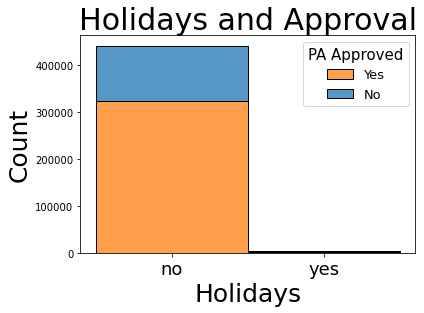

In [12]:
plt.figure()
sns.histplot(cmm_pa_train, x='is_holiday', hue = 'pa_approved',multiple = 'stack',discrete=True)
plt.xticks(ticks=[0,1], labels=["no","yes"],fontsize=18)
plt.title("Holidays and Approval",fontsize = 30)
plt.xlabel("Holidays",fontsize=25)
plt.ylabel("Count",fontsize = 25)
plt.legend(["Yes", "No"],title="PA Approved",fontsize=13,title_fontsize=15)


plt.show()

In [13]:
print("The percentage of people whose PA is approved on a holiday is: "
      , percentage_given(cmm_pa_train,'pa_approved',1,'is_holiday',1))

print("The percentage of people whose PA is approved on a non-holiday is: "
      , percentage_given(cmm_pa_train,'pa_approved',1,'is_holiday',0))

The percentage of people whose PA is approved on a holiday is:  73.232
The percentage of people whose PA is approved on a non-holiday is:  73.447


## pa_approved vs calenday_day

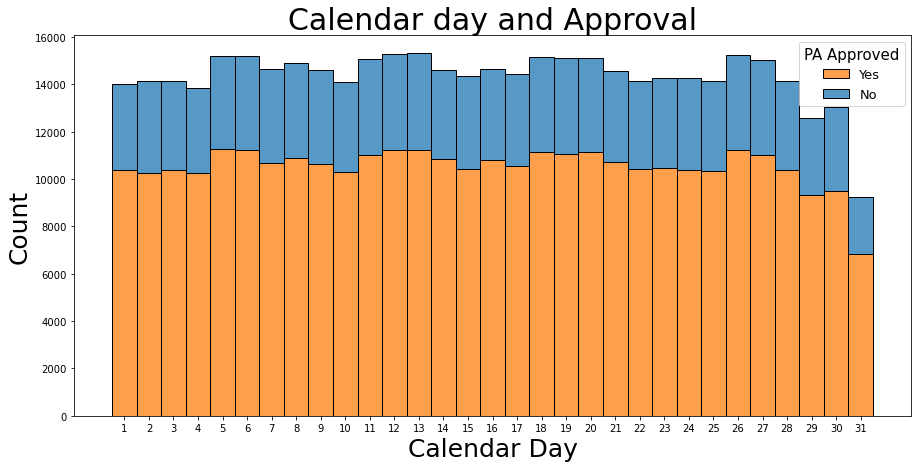

In [14]:
plt.figure(figsize=(15,7))
sns.histplot(cmm_pa_train, x='calendar_day', hue = 'pa_approved',multiple = 'stack',discrete=True)
plt.xticks(ticks=range(1,32),fontsize=10)
plt.title("Calendar day and Approval",fontsize = 30)
plt.xlabel("Calendar Day",fontsize=25)
plt.ylabel("Count",fontsize = 25)
plt.legend(["Yes", "No"],title="PA Approved",fontsize=13,title_fontsize=15)


plt.show()

In [15]:
days = cmm_pa_train.calendar_day.unique()
days= np.sort(days)
for day in days:
    print("The percentage of people whose PA is approved given that they apply on the ",day,"-th day of a month is : "

          , percentage_given(cmm_pa_train,'pa_approved',1,'calendar_day',day))

The percentage of people whose PA is approved given that they apply on the  1 -th day of a month is :  73.998
The percentage of people whose PA is approved given that they apply on the  2 -th day of a month is :  72.621
The percentage of people whose PA is approved given that they apply on the  3 -th day of a month is :  73.594
The percentage of people whose PA is approved given that they apply on the  4 -th day of a month is :  74.283
The percentage of people whose PA is approved given that they apply on the  5 -th day of a month is :  74.134
The percentage of people whose PA is approved given that they apply on the  6 -th day of a month is :  73.925
The percentage of people whose PA is approved given that they apply on the  7 -th day of a month is :  73.002
The percentage of people whose PA is approved given that they apply on the  8 -th day of a month is :  73.211
The percentage of people whose PA is approved given that they apply on the  9 -th day of a month is :  72.783
The percen

In [16]:
#Adding a datetime column to cmm_pa_train

def to_date(x):
    #year = x[0], month = x[1], day = x[2]
    return np.datetime64(datetime.datetime(x[0],x[1],x[2]))

cmm_pa_train['calendar_date'] = cmm_pa_train[['calendar_year','calendar_month','calendar_day']].apply(to_date,axis=1)

<ipython-input-16-c75a1204ebe2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmm_pa_train['calendar_date'] = cmm_pa_train[['calendar_year','calendar_month','calendar_day']].apply(to_date,axis=1)


In [17]:
# How many dates do we have
date_list = cmm_pa_train.calendar_date.unique()
date_list = np.sort(date_list)
#We have 1095 dates to take care of

count_PA_forms = [0]*len(date_list);
count_PA_approved = [0]*len(date_list);

#Number of entries(i.e. PA forms submitted) and number of PA forms approved on each of these dates 
i = 0;
for date in date_list:
    count_PA_forms[i] = np.sum(cmm_pa_train['calendar_date'] == date)
    count_PA_approved[i] = np.sum(np.logical_and(cmm_pa_train['calendar_date'] == date,cmm_pa_train['pa_approved'] == 1))
    i += 1;
    
PA_approved_percentage = np.divide(count_PA_approved,count_PA_forms)

In [18]:
PA_approved_percentage

datePA_df=pd.DataFrame(np.transpose([date_list,count_PA_forms,count_PA_approved,PA_approved_percentage]), columns=('Date','PA_count','PA_approved_count','PA_approved_percent'))
datePA_df['count_rolling'] = datePA_df.iloc[:,1].rolling(window=7).mean()
datePA_df['approved_rolling']=datePA_df.iloc[:,2].rolling(window=7).mean()
datePA_df['percent_rolling']=datePA_df.iloc[:,3].rolling(window=7).mean()


datePA_df.head(15)

,Date,PA_count,PA_approved_count,PA_approved_percent,count_rolling,approved_rolling,percent_rolling
0,1483228800000000000,82,54,0.658537,NaN,NaN,NaN
1,1483315200000000000,359,251,0.699164,NaN,NaN,NaN
2,1483401600000000000,478,325,0.679916,NaN,NaN,NaN
3,1483488000000000000,466,328,0.703863,NaN,NaN,NaN
4,1483574400000000000,477,358,0.750524,NaN,NaN,NaN
5,1483660800000000000,475,354,0.745263,NaN,NaN,NaN
6,1483747200000000000,160,120,0.75,356.714286,255.714286,0.712467
7,1483833600000000000,165,113,0.684848,368.571429,264.142857,0.716226
8,1483920000000000000,390,287,0.735897,373.000000,269.285714,0.721473
9,1484006400000000000,453,337,0.743929,369.428571,271.000000,0.730618


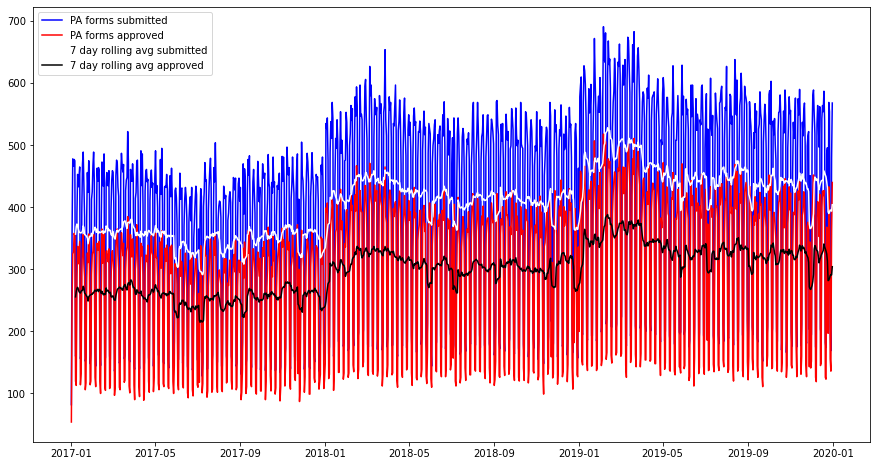

In [19]:
plt.figure(figsize=(15,8))
plt.plot(date_list,count_PA_forms,'b')
plt.plot(date_list,count_PA_approved,'r')
plt.plot(date_list,datePA_df.count_rolling,'w')
plt.plot(date_list,datePA_df.approved_rolling,'k')
plt.legend(['PA forms submitted','PA forms approved','7 day rolling avg submitted','7 day rolling avg approved'])

plt.show()


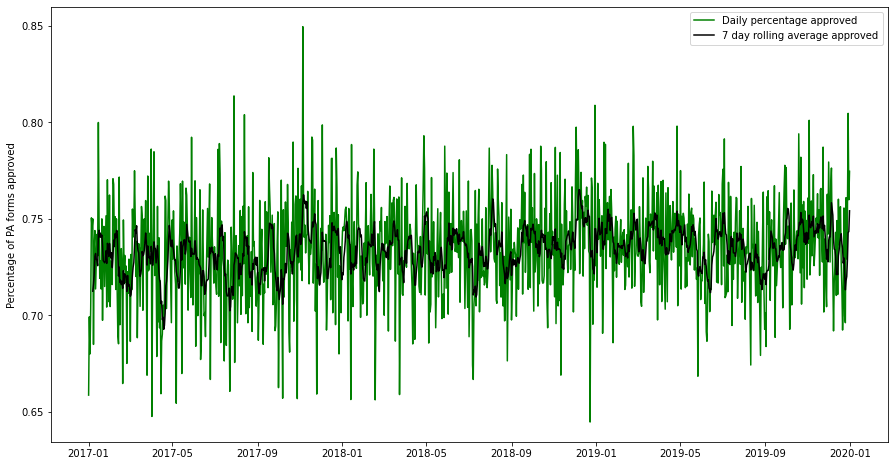

In [20]:
plt.figure(figsize=(15,8))
plt.plot(date_list,PA_approved_percentage,'g')
plt.plot(date_list,datePA_df.percent_rolling,'k')
plt.ylabel("Percentage of PA forms approved")
plt.legend(["Daily percentage approved","7 day rolling average approved"])
plt.show()